# CS 436 CS5310 - Computer Vision - Assignment#4 - Part#2

*__Submission Instructions:__*
- Rename this notebook to `PA4_rollnumber.ipynb` before submission on LMS.
- Code for all the tasks must be written in this notebook (you do not need to submit any other files).
- The output of all cells must be present in the version of the notebook you submit.
- The university honor code should be maintained. Any violation, if found, will result in disciplinary action.

In [0]:
#Mount your google drive to this notebook
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#This was my working directory(change this to your working directory)
%cd /content/gdrive/My Drive/PA4

/content/gdrive/My Drive/PA4


In [0]:
#imports
import keras
from keras.datasets import fashion_mnist,mnist,cifar10
from keras.layers import Activation, Input, Embedding, LSTM, Dense, Lambda, GaussianNoise, concatenate
from keras.models import Model
import numpy as np
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam, RMSprop
from keras.constraints import max_norm
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten, Activation, Conv2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.losses import categorical_crossentropy as logloss
from keras.metrics import categorical_accuracy
from keras.applications import vgg16
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib import offsetbox
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sn
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add
import struct
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from yolo3 import *
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

## Overview
Object detection is a task in computer vision that involves identifying the presence, location, and type of one or more objects in a given photograph.In recent years, deep learning techniques have achieved state-of-the-art results for object detection. Notable is the “You Only Look Once,” or YOLO, family of Convolutional Neural Networks that achieve near state-of-the-art results with a single end-to-end model that can perform object detection in real-time, we will be running YOLO-V3 for this assignment.

In this assignment you will :
- Run the pre-trained YOLO-V3 object detector on a sample image.
- Run the pre-trained YOLO-V3 object detctor  on images from PETS dataset(provided to you).
- From the object detected images we will create a top/satellite view.






## Task 1: Preapring the pre-trained model for a test run

Evaluate the performance of a pretrained network YOLO-V3 on a sample zebra image provided to you:
- Download the pre-trained model weights file "yolov3.weights"(provided to you) and place them into your current working directory. 
- Download the "yolo3.py" file provided to you and place it into your current working directory, this file contains all the helper functions we will be using for this part.
- Define the Keras model for YOLOv3 and load the downloaded weight file into this model.
- Run it on the sample image "zebra.jpg" provided to you.


In [0]:
#Define the yolo-v3 model. Call function "make_yolov3_model()" 
#This function will return a yolo-v3 model instance
#TO DO
model = make_yolov3_model()

In [0]:
#Load the model weights. Call function "WeightReader()" and pass the name of the downloaded weight file as
#an argument to this function, this function will return a weight reader instance
#TO DO
model_weights= WeightReader('yolov3.weights')

In [158]:
#Set the model weights into the model instance. Call function your_weight_reader_instance".load_weights()"
#and pass the yolo-v3 model instance as an argument
#TO DO

model_instance=  model_weights.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [0]:
#Input dminesions required by our model, we will be resizing our input image to this dimension
input_w, input_h = 416, 416
#Enter the path of zebra image in the variable "photo_filename"
photo_filename = '/content/gdrive/My Drive/PA4/zebra.jpg'
#Load and prepare image(Done for you)
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))

In [160]:
#Make prediction and save them in a variable named "yhat"
#TO DO
yhat= model.predict(image)

# summarize the shape of the list of arrays(Done for you)
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [0]:
#Define anchors(Done for you)
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
#Define the probability threshold for detected objects(Done for you)
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	#Decode the output of the network(Done for you)
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)

In [0]:
#Correct the sizes of the bounding boxes for the shape of the image(Done for you)
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

In [0]:
#Suppress non-maximal boxes(Done for you)
do_nms(boxes, 0.5)

In [0]:
#Get the labels, scores and box coordinates(Done for you)
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
#Get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

In [165]:
#Summarize what we found(Done for you)
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])


zebra 94.91059184074402
zebra 99.86329674720764
zebra 96.87087535858154


## Task 2: Visualizing extracted predictions as bounding boxes

We have extracted predictions from the object detctor that you can observe are very accurate too. Now we need to visualize these predictions as bounding boxes on the input image. For this part you are supposed to wite a function "draw_boxes" to visualize your predictions as bounding boxes. Inputs to this function will be outputs of the function "get_boxes". This function should also save the image along with the bounding boxes in your current working directory. Also show the predicted label and score for each bounding box. Sample output is shown to you.

In [0]:
def draw_boxes(filename, v_boxes, v_labels, v_scores):

	#TO DO
	data= pyplot.imread(filename)
	pyplot.imshow(data)
	ax= pyplot.gca()

	for i in range(len(v_boxes)):
		box= v_boxes[i]
		y1, x1, y2, x2= box.ymin, box.xmin, box.ymax, box.xmax
		width, height = x2-x1 , y2-y1
		rectangle= Rectangle ((x1,y1), width, height , fill= False, color='white') 
		ax.add_patch(rectangle)
		lbl= "%s (% 3f)"  % (v_labels[i], v_scores[i])
		pyplot.text(x1,y1, lbl, color= 'white')
	pyplot.show()

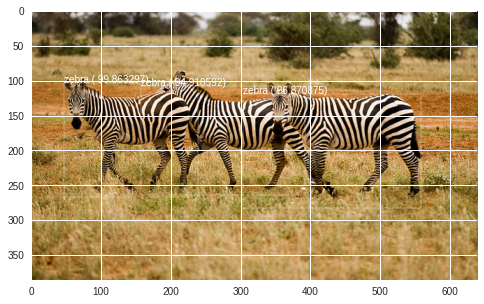

In [168]:
#Draw the bounding boxes on the sample image
# TO DO
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

## Task 3: Perfroming object detection on all images in the PETS dataset(provided to you)
Now when you have succesfully executed the code for object detection, we want you to perform object dection on all images in the PETS dataset provided to you and save them in a seperate folder in your working directory. In this part you will perform object detection in each of the images from different camera views in the PETS dataset. You have been given 10 images per view and 3 views in total.



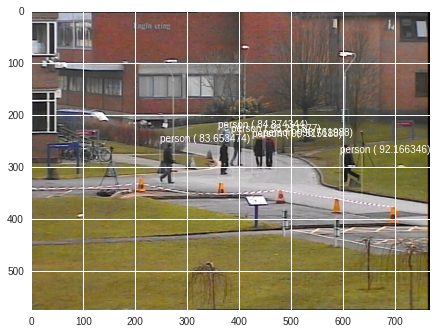

(None,
  <yolo3.BoundBox at 0x7f5b343a0780>])

In [170]:
#TO DO
#Object detection applied to all photos and saved individually in the folder
#for i in range(10):
def objectDetection(photo_filename):
  #photo_filename = '/content/gdrive/My Drive/PA4/PETS/View_001/frame_0000.jpg'
  image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
  yhat= model.predict(image)
  boxes = list()
  for i in range(len(yhat)):
	#Decode the output of the network(Done for you)
	  boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
  correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
  do_nms(boxes, 0.5)
  v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
  img= draw_boxes(photo_filename, v_boxes, v_labels, v_scores)
  return (img, v_boxes)

photo_filename= '/content/gdrive/My Drive/PA4/PETS/View_003/frame_0000.jpg'

objectDetection(photo_filename)
  
  


## Task 4: Viewing detected object location on Top View/Satellite view

In this part we will use the output from the previous part to project the location of detected objects on the top view/satellite view so that we can analyze all the objects present in the scene in one single view.

In this task you will :
- Go to the following link (http://maps.google.co.uk/maps?f=q&source=s_q&hl=en&geocode=&q=university+of+reading&sll=51.438895,-0.945747&sspn=0.007544,0.014055&ie=UTF8&ll=51.438895,-0.945747&sspn=0.007544,0.014055&ie=UTF8&ll=51.438534,-0.944561&spn=0.000943,0.001757&t=h&z=19) and capture a satellite view of the area that has been shown in the images of the PETS dataset
- Now perform object detection on all the images from PETS dataset provided to you. 
- Find the corresponding points in the satellite view image and any one of your object detected images.
- Compute the homography between the corresponding points. 
- Object detector will give you a list of bounding boxes, note the mid-point of the base of bounding box and project it on to the top view/satellite view using the computed homography. Top view/satellite view generated from a sample object detected image is provided to you for better understanding.
- Save all the top view images in a seperate folder in your working directory and submit it with the assignment on LMS.
- You need to perform all the above mentioned steps for each view seperately.

In [0]:
#Below is a sample image from the PETs dataset. You can also see "sample_image.jpg" provided to you
# View 1




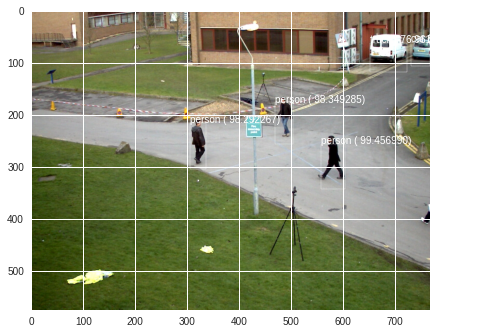

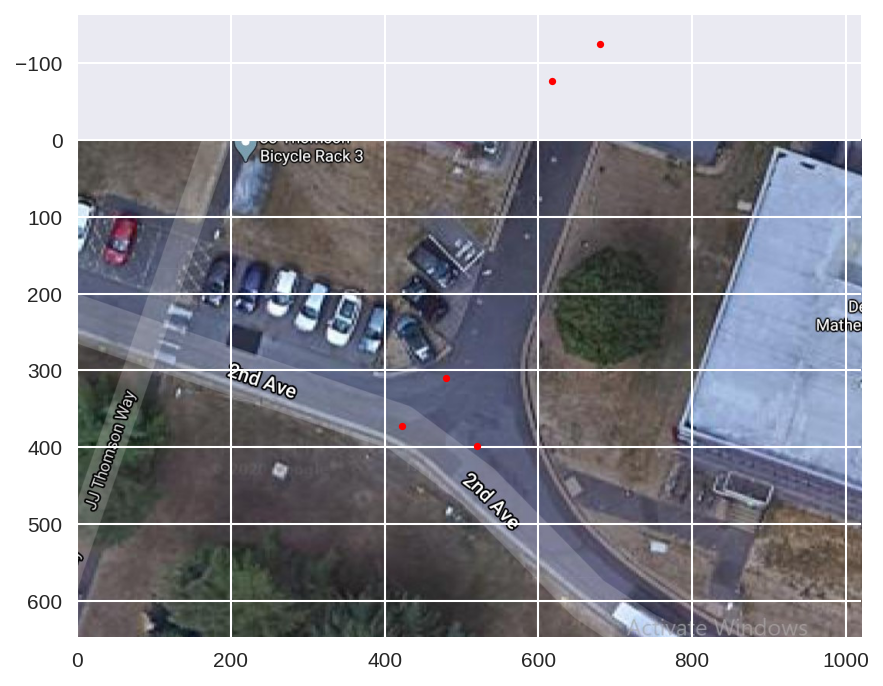

In [171]:
#All frames  and pictures applied to this and saved in the folder attached



# View 1
    pts_src = np.array([[433, 389], [241, 213], [724, 261],[561, 168], [634, 441], [490,265], [99, 253], [747,381], [285,241],
    [244,147], [169,199], [599, 211], [311,202], [480,158], [594,112], [675,111], [106,106], [175,484], [13, 297]   ])
    
    pts_dst = np.array([[480, 480],[391, 307],[583, 348],[496, 246],[529,488], [496,361],  [361, 381], [563, 447], [401, 345], [321, 181], [328, 282], [520, 307], [417,290], 
    [488,200], [533,32], [580,27],[122,69], [390,518], [310,404]   ])
    h, status = cv2.findHomography(pts_src, pts_dst)
   

    
    

    image ,v_box = objectDetection('/content/gdrive/My Drive/PA4/PETS/View_001/frame_0009.jpg')
    img=  np.array(mpimg.imread('/content/gdrive/My Drive/PA4/satellite.jpg'))
    img.setflags(write=1) 
    figure(dpi=150)
    
    plt.imshow(img)
    for i in range(len(v_box)):
      box= v_box[i]
      y1, x1, y2, x2= box.ymin, box.xmin, box.ymax, box.xmax
      x= (x1 +x2)/2
      y=(y1+y2)/2
      pt1= np.array([x,y ,1])
      pt1= pt1.reshape(3,1) 
    
      pt2= np.dot(h, pt1)
      pt2= pt2/pt2[2]
      
      xax= float(pt2[0])
      yax= float(pt2[1])
      plt.plot(xax, yax, 'r.')

    


    

    
    



#img.setflags(write=1) 

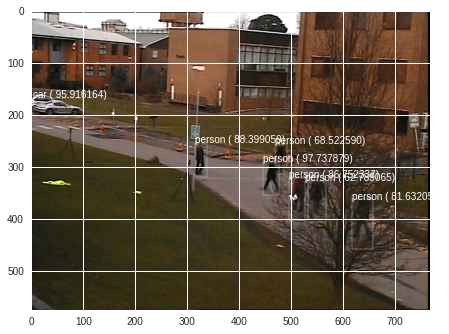

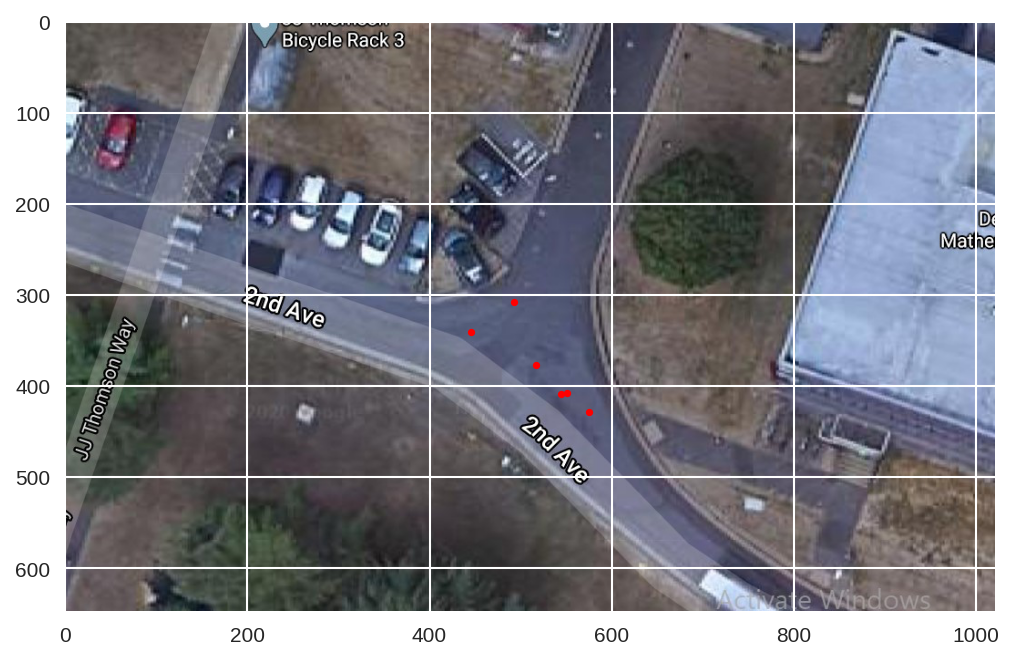

In [143]:
#View2
    pts_src = np.array([[309,341], [377,286], [212,283], [452,289], [499,444], [263,263], [501,226], [43,361],[443,324], [207,222], [249,293], [29,343], [540,384], 
               [534, 317], [438,224]         ])
    
    pts_dst = np.array([ [440,449], [418,303], [337,369], [452,292], [570,524], [330, 289], [621,290], [587,364] , [502,308], [180,132],
          [390, 398], [376,551], [561,445], [511,334], [356, 69]              ])
    h, status = cv2.findHomography(pts_src, pts_dst)
   

    
    

    image ,v_box = objectDetection('/content/gdrive/My Drive/PA4/PETS/View_002/frame_0009.jpg')
    img=  np.array(mpimg.imread('/content/gdrive/My Drive/PA4/satellite.jpg'))
    img.setflags(write=1) 
    figure(dpi=150)
    
    plt.imshow(img)
    for i in range(len(v_box)):
      box= v_box[i]
      y1, x1, y2, x2= box.ymin, box.xmin, box.ymax, box.xmax
      x= (x1 +x2)/2
      y=(y1+y2)/2
      pt1= np.array([x,y ,1])
      pt1= pt1.reshape(3,1) 
    
      pt2= np.dot(h, pt1)
      pt2= pt2/pt2[2]
      
      xax= float(pt2[0])
      yax= float(pt2[1])
      if(xax and yax>0):
        plt.plot(xax, yax, 'r.')

    

    
      


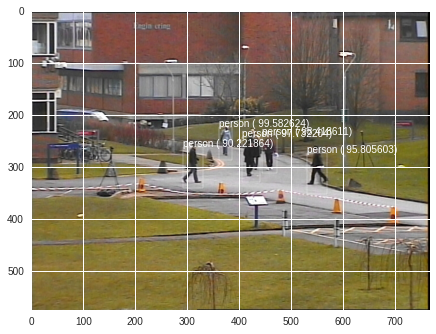

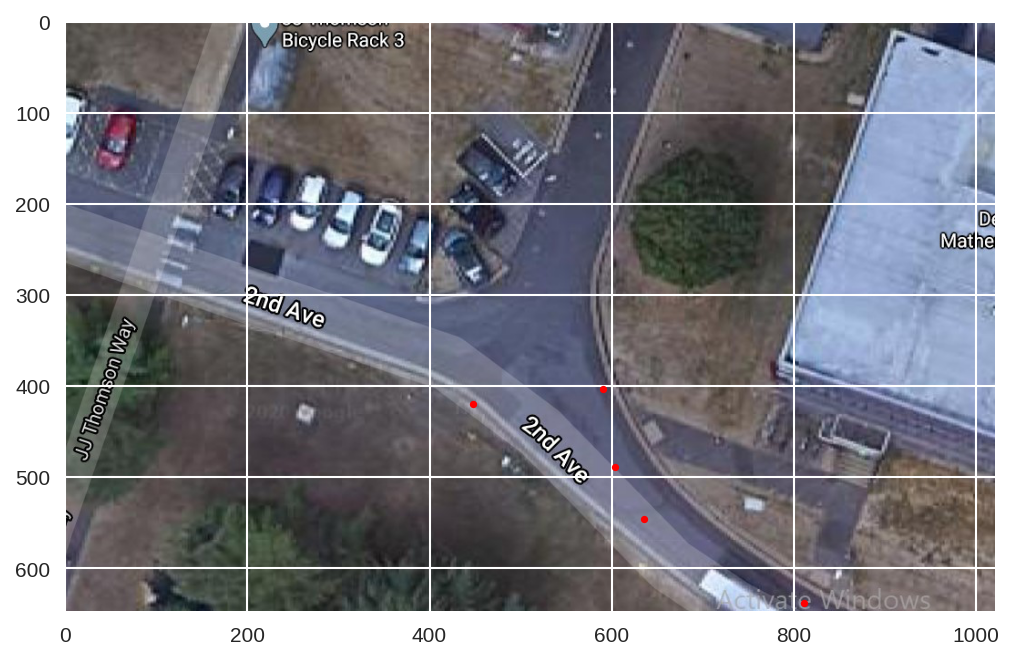

In [154]:
#View 3
    pts_src = np.array([[556,326], [253,347], [438,327], [298,306], [581,377], [44,357], [342,299], [627,365], [529,286], [295,268], [739,411],
                [52,289], [422,283], [722,296], [325,323], [559,334]        ])
    
    pts_dst = np.array([ [435,410], [451,293], [486,361],[583,328], [329,289], [502,232], [542,364], [352,331], [550,509], [778,590], [150,215],
         [773, 387], [610,500] ,[396,503], [521,317],[413,412]              ])
    h, status = cv2.findHomography(pts_src, pts_dst)
   

    
    

    image ,v_box = objectDetection('/content/gdrive/My Drive/PA4/PETS/View_003/frame_0009.jpg')
    img=  np.array(mpimg.imread('/content/gdrive/My Drive/PA4/satellite.jpg'))
    img.setflags(write=1) 
    figure(dpi=150)
    
    plt.imshow(img)
    for i in range(len(v_box)):
      box= v_box[i]
      y1, x1, y2, x2= box.ymin, box.xmin, box.ymax, box.xmax
      x= (x1 +x2)/2
      y=(y1+y2)/2
      pt1= np.array([x,y ,1])
      pt1= pt1.reshape(3,1) 
    
      pt2= np.dot(h, pt1)
      pt2= pt2/pt2[2]
      
      xax= float(pt2[0])
      yax= float(pt2[1])
      if(xax and yax>0):
        plt.plot(xax, yax, 'r.')

    

    
      
